Load Modules & Data

In [2]:
# Load Modules
#
import pandas as pd
import numpy as np
from datetime import datetime 

#
from matplotlib import pyplot as plt
import seaborn as sns

#
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import RandomizedLasso


from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report, roc_curve


In [3]:
# Import and load data to memory
#ss_data_path = r'/Users/travisvolpe/desktop/SurvivalStudy/Notebook/Data/SurvivalStudy_5_20_19_Genus.csv'
#ss = pd.read_csv(ss_data_path, sep=',')
#ss

In [58]:
# Import and load data to memory
ss_data_path = r'/Users/travisvolpe/desktop/SurvivalStudy/Notebook/Data/SS_Data_sty.csv'
ss = pd.read_csv(ss_data_path, sep=',')
ss

,FID,CT_Tag_ID,Date_Ptd,Cultivar,SciName,CmmnName,DBH,Program,EventORAdd,Impervious,...,db_Nursery,db_Genus,db_Species,db_mtc,db_pltdbh,isAlive,Death_Yr,Death_Age,Age,Cond_Agg
0,0,CT12134016,4/11/2015 0:00:00,,Quercus muehlenbergii,"Oak, Chinkapin",2.5,CTP,Armed Forces Retirement Home - Spring 2015,0%,...,Casey Tree Farm,Quercus,muehlenbergii,Good,1.5,1,0,0,4,Good
1,1,CT12124044,4/22/2015 0:00:00,,Betula nigra,"Birch, River",12.0,DDOE,3224 Military rd NW,,...,Casey Tree Farm,Betula,nigra,,1.2,1,0,0,4,Good
2,2,CT12124063,4/6/2015 0:00:00,,Betula nigra,"Birch, River",8.0,DDOE,5619 Colorado st NW,,...,Casey Tree Farm,Betula,nigra,,8.0,0,2018,3,3,Missing
3,3,CT12131001,5/14/2015 0:00:00,,Quercus macrocarpa,"Oak, Bur",2.0,DDOE,"3425 Rodman St NW Washington, DC, United States",,...,Casey Tree Farm,Quercus,macrocarpa,,2.0,1,0,0,4,Good
4,4,CT12133007,4/11/2015 0:00:00,,Quercus muehlenbergii,"Oak, Chinkapin",2.6,CTP,Armed Forces Retirement Home - Spring 2015,0%,...,Casey Tree Farm,Quercus,muehlenbergii,Good,2.0,1,0,0,4,Good
5,5,CT13219082,11/18/2015 0:00:00,,Cercis canadensis,"Redbud, Eastern",0.0,DDOE,5305 5 th st NW,,...,Casey Tree Farm,Cercis,canadensis,,0.0,1,0,0,4,Left Card
6,6,CT13221059,3/31/2015 0:00:00,,Halesia monticola,"Silverbell, Mountain",1.5,DDOE,3517 24th ne,,...,Casey Tree Farm,Halesia,monticola,,1.5,1,0,0,4,Left Card
7,7,CT13221066,5/13/2015 0:00:00,,Halesia monticola,"Silverbell, Mountain",1.5,DDOE,38 Farragut pl NW,,...,Casey Tree Farm,Halesia,monticola,,1.5,1,0,0,4,Left Card
8,8,CT13221067,4/11/2015 0:00:00,,Halesia monticola,"Silverbell, Mountain",3.1,CTP,Armed Forces Retirement Home - Spring 2015,0%,...,Casey Tree Farm,Halesia,monticola,,1.5,1,0,0,4,Good
9,9,CT13221069,4/22/2015 0:00:00,,Halesia monticola,"Silverbell, Mountain",1.5,DDOE,3813 windom Pl nw,,...,Casey Tree Farm,Halesia,monticola,,1.5,0,2018,3,3,Missing


In [59]:
# Import and Load Data with 2018 SCA Missing removed 
ss_data_path2 = r'/Users/travisvolpe/desktop/SurvivalStudy/Notebook/Data/SS_Data_sty_scaremoved2.csv'
ss_18rmv = pd.read_csv(ss_data_path2, sep=',')
ss_18rmv.shape

(9356, 62)

Part II: Exploratory Analysis

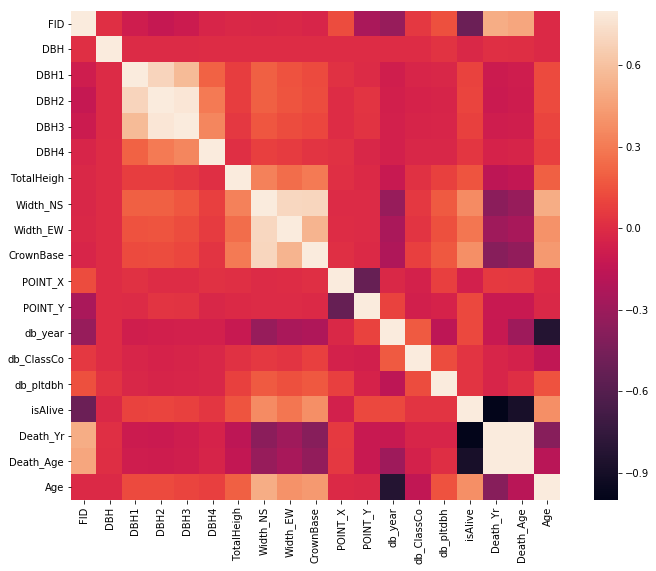

In [60]:
correlation_matrix = ss.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix, vmax=0.8, square=True)
plt.show()

In [61]:
# Survival rate for SpaceType
st_dead = ss[(ss.isAlive == 0)].SpaceType1.value_counts()

st_alive = ss[(ss.isAlive == 1)].SpaceType1.value_counts()

st_total = ss[(ss.isAlive == 0) | (ss.isAlive == 1)].SpaceType1.value_counts()

st_death_rate = (ss[(ss.isAlive == 0)].SpaceType1.value_counts() / ss[(ss.isAlive == 0) | (ss.isAlive == 1)].SpaceType1.value_counts() * 100)

st_survival_rate = (ss[(ss.isAlive == 1)].SpaceType1.value_counts() / ss[(ss.isAlive == 0) | (ss.isAlive == 1)].SpaceType1.value_counts() * 100)

print("Dead # : ",st_dead)
print("Alive # : ",st_alive)
print("Total # : ",st_total)
print("Death Rate # : ",st_death_rate)
print("Survival Rate # : ",st_survival_rate)

Dead # :  Open Land          676
Maintained Land    510
Planting Strip     273
Unknown            231
Natural Area       209
Tree Box            80
Front Yard          76
Back Yard           66
Road Median         32
Side Yard           24
Name: SpaceType1, dtype: int64
Alive # :  Maintained Land    2742
Back Yard          1048
Front Yard          958
Planting Strip      785
Natural Area        664
Open Land           418
Unknown             332
Side Yard           315
Tree Box            224
Road Median         198
Name: SpaceType1, dtype: int64
Total # :  Maintained Land    3252
Back Yard          1114
Open Land          1094
Planting Strip     1058
Front Yard         1034
Natural Area        873
Unknown             563
Side Yard           339
Tree Box            304
Road Median         230
Name: SpaceType1, dtype: int64
Death Rate # :  Back Yard           5.924596
Front Yard          7.350097
Maintained Land    15.682657
Natural Area       23.940435
Open Land          61.791590
Plan

In [8]:
# Survival rate for SpaceType (SCA Removed)
st_dead = ss_18rmv[(ss_18rmv.isAlive == 0)].SpaceType1.value_counts()

st_alive = ss_18rmv[(ss_18rmv.isAlive == 1)].SpaceType1.value_counts()

st_total = ss_18rmv[(ss_18rmv.isAlive == 0) | (ss_18rmv.isAlive == 1)].SpaceType1.value_counts()

st_death_rate = (ss_18rmv[(ss_18rmv.isAlive == 0)].SpaceType1.value_counts() / ss_18rmv[(ss_18rmv.isAlive == 0) | (ss_18rmv.isAlive == 1)].SpaceType1.value_counts() * 100)

st_survival_rate = (ss_18rmv[(ss_18rmv.isAlive == 1)].SpaceType1.value_counts() / ss_18rmv[(ss_18rmv.isAlive == 0) | (ss_18rmv.isAlive == 1)].SpaceType1.value_counts() * 100)

print("Dead # : ",st_dead)
print("Alive # : ",st_alive)
print("Total # : ",st_total)
print("Death Rate # : ",st_death_rate)
print("Survival Rate # : ",st_survival_rate)

Dead # :  Open Land          667
Maintained Land    321
Planting Strip     245
Unknown            197
Tree Box            70
Front Yard          67
Back Yard           53
Natural Area        52
Road Median         27
Side Yard           19
Name: SpaceType1, dtype: int64
Alive # :  Maintained Land    2706
Back Yard          1048
Front Yard          958
Planting Strip      785
Natural Area        654
Open Land           418
Unknown             332
Side Yard           315
Tree Box            224
Road Median         198
Name: SpaceType1, dtype: int64
Total # :  Maintained Land    3027
Back Yard          1101
Open Land          1085
Planting Strip     1030
Front Yard         1025
Natural Area        706
Unknown             529
Side Yard           334
Tree Box            294
Road Median         225
Name: SpaceType1, dtype: int64
Death Rate # :  Back Yard           4.813806
Front Yard          6.536585
Maintained Land    10.604559
Natural Area        7.365439
Open Land          61.474654
Plan

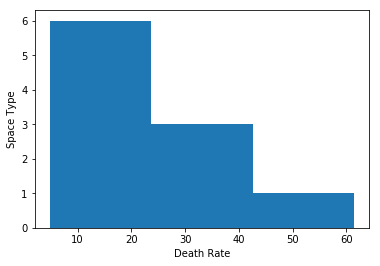

In [9]:
# Plot Survival & Death Rates 
plt.hist(st_death_rate, bins=3)
plt.xlabel('Death Rate')
plt.ylabel('Space Type')
plt.show()

In [10]:
# Survival rate for Nursery
nurse_dead = ss[(ss.isAlive == 0)].db_Nursery.value_counts()

nurse_alive = ss[(ss.isAlive == 1)].db_Nursery.value_counts()

nurse_total = ss[(ss.isAlive == 0) | (ss.isAlive == 1)].db_Nursery.value_counts()

nurse_death_rate = (ss[(ss.isAlive == 0)].db_Nursery.value_counts() / ss[(ss.isAlive == 0) | (ss.isAlive == 1)].db_Nursery.value_counts() * 100)

nurse_survival_rate = (ss[(ss.isAlive == 1)].db_Nursery.value_counts() / ss[(ss.isAlive == 0) | (ss.isAlive == 1)].db_Nursery.value_counts() * 100) 

print("Dead # : ",nurse_dead)
print("Alive # : ",nurse_alive)
print("Total # : ",nurse_total)
print("Death Rate # : ",nurse_death_rate)
print("Survival Rate # : ",nurse_survival_rate)

Dead # :  Bremo Trees                    468
Casey Tree Farm                348
Rebate                         272
Riveredge Farms                156
Angelica                       124
Edible Landscapes              113
Merrifield                      92
Ruppert                         83
Robin Hill Farm Nursery         79
Kuenzi                          59
Watkins Nurseries               50
Shemin                          41
Ingleside                       28
Country Springs Wholesale       24
Earth Sangha                    24
Valley Crest                    24
Nature by Design                22
Princeton Nurseries             16
American Native Plants          15
Gro-Getters                     15
Tennessee Trees                 14
Shade Tree Nursery              13
Bobtown                         13
Buddies Nursery                  9
Spring Hill                      9
Mrs. Casey's Mansion             8
Homewood Gardens                 7
Rose Creek Nursery               7
USDA/Belts

In [11]:
# Plot Nursery Survival & Death Rates 

In [12]:
# Program Survival & Death Rates 
prog_dead = ss[(ss.isAlive == 0)].db_Prog.value_counts()

prog_alive = ss[(ss.isAlive == 1)].db_Prog.value_counts()

prog_total = ss[(ss.isAlive == 0) | (ss.isAlive == 1)].db_Prog.value_counts()

prog_death_rate = (ss[(ss.isAlive == 0)].db_Prog.value_counts() / ss[(ss.isAlive == 0) | (ss.isAlive == 1)].db_Prog.value_counts() * 100)

prog_survival_rate = (ss[(ss.isAlive == 1)].db_Prog.value_counts() / ss[(ss.isAlive == 0) | (ss.isAlive == 1)].db_Prog.value_counts() * 100)

print("Dead # : ",prog_dead)
print("Alive # : ",prog_alive)
print("Total # : ",prog_total)
print("Death Rate # : ",prog_death_rate)
print("Survival Rate # : ",prog_survival_rate)

Dead # :  CTP           1425
REBATE         272
No Program     200
DDOE            88
RSH             88
AER             38
DDOT Other      33
FFS             17
PEPCO            9
TGA              4
DDOT Elms        2
DOEE             1
Name: db_Prog, dtype: int64
Alive # :  CTP           4265
REBATE         887
RSH            864
DDOE           843
No Program     503
DDOT Other     117
PEPCO          106
AER             53
FFS             41
DDOT Elms        5
Name: db_Prog, dtype: int64
Total # :  CTP           5690
REBATE        1159
RSH            952
DDOE           931
No Program     703
DDOT Other     150
PEPCO          115
AER             91
FFS             58
DDOT Elms        7
TGA              4
DOEE             1
Name: db_Prog, dtype: int64
Death Rate # :  AER            41.758242
CTP            25.043937
DDOE            9.452202
DDOT Elms      28.571429
DDOT Other     22.000000
DOEE          100.000000
FFS            29.310345
No Program     28.449502
PEPCO           7.8260

In [13]:
# Plot Program Survival & Death Rates 

In [14]:
# Season Survival & Death Rates 
sea_dead = ss[(ss.isAlive == 0)].db_Season.value_counts()

sea_alive = ss[(ss.isAlive == 1)].db_Season.value_counts()

sea_total = ss[(ss.isAlive == 0) | (ss.isAlive == 1)].db_Season.value_counts()

sea_death_rate = (ss[(ss.isAlive == 0)].db_Season.value_counts() / ss[(ss.isAlive == 0) | (ss.isAlive == 1)].db_Season.value_counts() * 100)

sea_survival_rate = (ss[(ss.isAlive == 1)].db_Season.value_counts() / ss[(ss.isAlive == 0) | (ss.isAlive == 1)].db_Season.value_counts() * 100)

print("Dead # : ", sea_dead)
#print(sorted(zip(map(lambda x: round(x, 4), db_Season), sea_dead), reverse=False))
print("Alive # : ",sea_alive)
print("Total # : ",sea_total)
print("Death Rate # : ",sea_death_rate)
print("Survival Rate # : ",sea_survival_rate)

Dead # :  Spring    1235
Fall       942
Name: db_Season, dtype: int64
Alive # :  Spring    4224
Fall      3460
Name: db_Season, dtype: int64
Total # :  Spring    5459
Fall      4402
Name: db_Season, dtype: int64
Death Rate # :  Spring    22.623191
Fall      21.399364
Name: db_Season, dtype: float64
Survival Rate # :  Spring    77.376809
Fall      78.600636
Name: db_Season, dtype: float64


In [15]:
# Plot Jursidiction Survival & Death Rates 

In [16]:
# Stock Type Survival & Death Rates
stkt_dead = ss[(ss.isAlive == 0)].db_StockT.value_counts()

stkt_alive = ss[(ss.isAlive == 1)].db_StockT.value_counts()

stkt_total = ss[(ss.isAlive == 0) | (ss.isAlive == 1)].db_StockT.value_counts()

stkt_death_rate = (ss[(ss.isAlive == 0)].db_StockT.value_counts() / ss[(ss.isAlive == 0) | (ss.isAlive == 1)].db_StockT.value_counts() * 100)

stkt_survival_rate = (ss[(ss.isAlive == 1)].db_StockT.value_counts() / ss[(ss.isAlive == 0) | (ss.isAlive == 1)].db_StockT.value_counts() * 100)

print("Dead # : ",stkt_dead)
print("Alive # : ",stkt_alive)
print("Total # : ",stkt_total)
print("Death Rate # : ",stkt_death_rate)
print("Survival Rate # : ",stkt_survival_rate)

Dead # :  BB         1237
CT          397
Unknown     303
RB          139
BR           97
HB            4
Name: db_StockT, dtype: int64
Alive # :  BB         4810
CT         1061
Unknown    1045
RB          671
BR           71
HB           26
Name: db_StockT, dtype: int64
Total # :  BB         6047
CT         1458
Unknown    1348
RB          810
BR          168
HB           30
Name: db_StockT, dtype: int64
Death Rate # :  BB         20.456425
CT         27.229081
Unknown    22.477745
RB         17.160494
BR         57.738095
HB         13.333333
Name: db_StockT, dtype: float64
Survival Rate # :  BB         79.543575
CT         72.770919
Unknown    77.522255
RB         82.839506
BR         42.261905
HB         86.666667
Name: db_StockT, dtype: float64


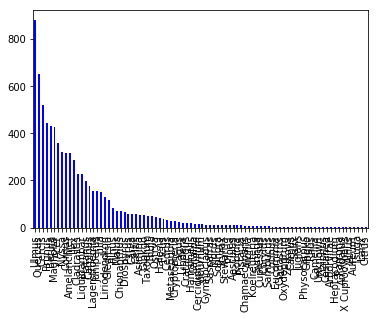

In [17]:
ss[(ss.isAlive == 1)].db_Genus.value_counts().plot(kind='bar', color='b');

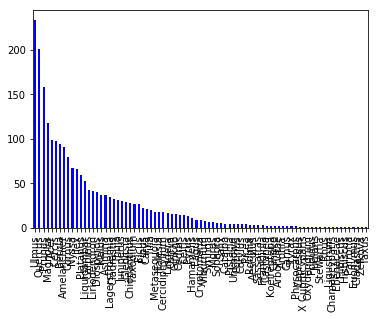

In [18]:
ss[(ss.isAlive == 0)].db_Genus.value_counts().plot(kind='bar', color='b');

Feature ENG

In [19]:
ss.isnull().sum()

FID             0
CT_Tag_ID       0
Date_Ptd        0
Cultivar        0
SciName         0
CmmnName        0
DBH             0
Program         0
EventORAdd      0
Impervious      0
DBH1            0
DBH2            0
DBH3            0
DBH4            0
TotalHeigh      0
Width_NS        0
Width_EW        0
PercentMis      0
CrownCondi      0
TreeStruct      0
SpaceType1      0
CrownBase       0
Jurisdicti      0
SpaceTypeD      0
Cond_18       122
SpaceType       0
Condition       0
DDOE            0
PTG_Notes       0
Cond_12         1
             ... 
StockType       0
Class_Code      0
Mntc_Condn      0
Season          0
Nursery         0
Condit_13       0
POINT_X         0
POINT_Y         0
Cond_17        44
Cond_16         0
Cond_15         0
Cond_14       168
db_jdx          0
db_year         0
db_Season       0
db_removed      0
db_SpaceTy      0
db_Prog         0
db_StockT       0
db_ClassCo      0
db_Nursery      0
db_Genus        0
db_Species      0
db_mtc          0
db_pltdbh 

In [29]:
ss_drop = ss.drop(['FID','CT_Tag_ID', 'Date_Ptd', 'Cultivar', 'EventORAdd', 'Impervious', 'DBH', 'DBH1', 'DBH2','DBH3','DBH4', 'TotalHeigh',
                   'Width_NS', 'Width_EW', 'PercentMis', 'CrownCondi', 'TreeStruct', 'Class_Code', 'POINT_X', 'POINT_Y', 
                    'CrownBase', 'db_pltdbh', 'Condition', 'DDOE', 'SpaceType', 'PTG_Notes', 'Genus', 'Species',
                    'StockType', 'Mntc_Condn', 'Season', 'db_ClassCo', 'db_mtc', 'db_Species', 'Nursery', 'SpaceTypeD',
                    'db_removed', 'Cond_18', 'Cond_17', 'Cond_16', 'Cond_15', 'Cond_14', 'Condit_13', 'Cond_12', 'Death_Yr', 'Death_Age',
                    'Cond_Agg', 'db_year', 'Jurisdicti', 'Program', 'SciName', 'CmmnName', 'db_SpaceTy'],
                  axis=1)
ss_drop.dtypes
ss_drop.columns

# In order to include the various numeric fields you will need to apply a standard scaler 


Index(['SpaceType1', 'db_jdx', 'db_Season', 'db_Prog', 'db_StockT',
       'db_Nursery', 'db_Genus', 'isAlive', 'Age'],
      dtype='object')

In [21]:
feat_cols = ['db_jdx', 'db_Season', 'SpaceType1', 'db_Prog', 'db_StockT', 'db_Nursery', 'db_Genus']

In [22]:
ss_drop2 = ss_18rmv.drop(['FID','CT_Tag_ID', 'Date_Ptd', 'Cultivar', 'EventORAdd', 'Impervious', 'DBH', 'DBH1', 'DBH2','DBH3','DBH4', 'TotalHeigh',
                   'Width_NS', 'Width_EW', 'PercentMis', 'CrownCondi', 'TreeStruct', 'Class_Code', 'POINT_X', 'POINT_Y', 
                    'CrownBase', 'db_pltdbh', 'Condition', 'DDOE', 'SpaceType', 'PTG_Notes', 'Genus', 'Species',
                    'StockType', 'Mntc_Condn', 'Season', 'db_ClassCo', 'db_mtc', 'db_Species', 'Nursery', 'SpaceTypeD',
                    'db_removed', 'Cond_18', 'Cond_17', 'Cond_16', 'Cond_15', 'Cond_14', 'Condit_13', 'Cond_12', 'Death_Yr', 'Death_Age',
                    'Cond_Agg', 'db_year', 'Age', 'Jurisdicti', 'Program', 'SciName', 'CmmnName', 'db_SpaceTy'],
                  axis=1)
ss_drop2.dtypes
ss_drop2.columns

# In order to include the various numeric fields you will need to apply a standard scaler 

#feat_cols = ['db_jdx', 'db_Season', 'SpaceType1', 'db_Prog', 'db_StockT', 'db_Nursery', 'db_Genus']

Index(['SpaceType1', 'db_jdx', 'db_Season', 'db_Prog', 'db_StockT',
       'db_Nursery', 'db_Genus', 'isAlive'],
      dtype='object')

In [23]:
# Extract month the tree was planted
# I was having trouble getting this to run. I can get it to return the date in a year-month-day formated but 
# I could not get it to return just the month 

month = []

dates = ss.Date_Ptd[0:9861]

split_dates = pd.to_datetime(dates, format='%m/%d/%Y %H:%M:%S')

split_dates.value_counts()

split_dates

# split_dates.month
# Returns AttributeError: 'Series' object has no attribute 'month'

#split_dates = (lambda dates: datetime.strptime(dates, '%m/%d/%Y %H:%M:%S'))

#split_dates = [datetime.strptime(dates, %m/%d/%Y %H:%M:%S') for Date_Ptd in dates]

#for Date_Ptd in dates:
#    datetime.strptime(dates, '%m/%d/%Y%H')

0      2015-04-11
1      2015-04-22
2      2015-04-06
3      2015-05-14
4      2015-04-11
5      2015-11-18
6      2015-03-31
7      2015-05-13
8      2015-04-11
9      2015-04-22
10     2015-04-16
11     2015-04-21
12     2015-04-21
13     2015-04-11
14     2015-11-03
15     2015-11-10
16     2015-03-31
17     2015-11-25
18     2015-11-25
19     2015-11-25
20     2015-12-04
21     2015-12-04
22     2015-12-04
23     2015-12-14
24     2015-11-06
25     2015-11-24
26     2015-12-01
27     2015-11-24
28     2015-10-30
29     2015-11-18
          ...    
9831   2010-04-30
9832   2010-04-26
9833   2010-04-27
9834   2010-04-27
9835   2010-05-05
9836   2010-05-10
9837   2010-05-25
9838   2010-05-06
9839   2010-06-03
9840   2010-10-16
9841   2010-10-14
9842   2010-10-16
9843   2010-10-19
9844   2010-10-20
9845   2010-10-23
9846   2010-11-06
9847   2010-11-13
9848   2010-11-16
9849   2010-11-20
9850   2010-11-20
9851   2010-11-20
9852   2010-12-02
9853   2010-12-07
9854   2010-12-15
9855   201

In [24]:
# This was the first technique I used to encode categorical variables 
# It seemed to work but I was not totally sure what it was doing
# and it returned more columns (1 more) than get dummy variables 
# I am assuming this is because season only has two values and since
# they are correlated dummies dropped wheras this must be specified in OHE

X = ss_drop
ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [0, 1, 2, 3, 4, 5, 6, 7]),],
    remainder='passthrough'
)
ct.fit_transform(X)
#print(ct.fit_transform(X))
ct.fit_transform(X).shape

(9861, 198)

In [30]:
# Get Dummy Variables

#pd.get_dummies(
#    data,
#    prefix=None,
#    prefix_sep='_',
#    dummy_na=False,
#    columns=None,
#    sparse=False,
#    drop_first=False,
#    dtype=None,
#)

df = pd.DataFrame(ss_drop)

#use pd.concat to join the new columns with your original dataframe
#df = pd.concat([df,pd.get_dummies(df)])
df = pd.concat([df,pd.get_dummies(df['SpaceType1'], prefix='SpaceType1')],axis=1)
df = pd.concat([df,pd.get_dummies(df['db_jdx'], prefix='db_jdx')],axis=1)
df = pd.concat([df,pd.get_dummies(df['db_Season'], prefix='db_Season')],axis=1)
df = pd.concat([df,pd.get_dummies(df['db_Prog'], prefix='db_Prog')],axis=1)
df = pd.concat([df,pd.get_dummies(df['db_StockT'], prefix='db_StockT')],axis=1)
df = pd.concat([df,pd.get_dummies(df['db_Nursery'], prefix='db_Nursery')],axis=1)
df = pd.concat([df,pd.get_dummies(df['db_Genus'], prefix='db_Genus')],axis=1)

df.drop(['SpaceType1'],axis=1, inplace=True)
df.drop(['db_jdx'],axis=1, inplace=True)
df.drop(['db_Season'],axis=1, inplace=True)
df.drop(['db_Prog'],axis=1, inplace=True)
df.drop(['db_StockT'],axis=1, inplace=True)
df.drop(['db_Nursery'],axis=1, inplace=True)
df.drop(['db_Genus'],axis=1, inplace=True)

#df.shape
#df.columns

#ss_final = df.iloc[:, 1:200]
#ss_final

In [31]:
df2 = pd.DataFrame(ss_drop2)

df2 = pd.concat([df2,pd.get_dummies(df2['SpaceType1'], prefix='SpaceType1')],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['db_jdx'], prefix='db_jdx')],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['db_Season'], prefix='db_Season')],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['db_Prog'], prefix='db_Prog')],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['db_StockT'], prefix='db_StockT')],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['db_Nursery'], prefix='db_Nursery')],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['db_Genus'], prefix='db_Genus')],axis=1)

df2.drop(['SpaceType1'],axis=1, inplace=True)
df2.drop(['db_jdx'],axis=1, inplace=True)
df2.drop(['db_Season'],axis=1, inplace=True)
df2.drop(['db_Prog'],axis=1, inplace=True)
df2.drop(['db_StockT'],axis=1, inplace=True)
df2.drop(['db_Nursery'],axis=1, inplace=True)
df2.drop(['db_Genus'],axis=1, inplace=True)

In [32]:
# Feat Col Names 
nnames = pd.DataFrame(X)
names2 = list(X.columns)
names2

['SpaceType1_Back Yard',
 'SpaceType1_Front Yard',
 'SpaceType1_Maintained Land',
 'SpaceType1_Natural Area',
 'SpaceType1_Open Land',
 'SpaceType1_Planting Strip',
 'SpaceType1_Road Median',
 'SpaceType1_Side Yard',
 'SpaceType1_Tree Box',
 'SpaceType1_Unknown',
 'db_jdx_ ',
 'db_jdx_CHRTERSCHOOL',
 'db_jdx_COMMERCIAL',
 'db_jdx_DCPS',
 'db_jdx_DDOT',
 'db_jdx_DOT',
 'db_jdx_DPR',
 'db_jdx_FED MILITARY',
 'db_jdx_FED NON-MILITARY',
 'db_jdx_NPS',
 'db_jdx_OTHPRIVATE',
 'db_jdx_OTHRMUNGOV',
 'db_jdx_PRIVATE',
 'db_jdx_PRIVTSCHOOL',
 'db_jdx_PUBSCHOOL',
 'db_jdx_RESIDENTIAL',
 'db_jdx_UNIVERSITY',
 'db_Season_Fall',
 'db_Season_Spring',
 'db_Prog_AER',
 'db_Prog_CTP',
 'db_Prog_DDOE',
 'db_Prog_DDOT Elms',
 'db_Prog_DDOT Other',
 'db_Prog_DOEE',
 'db_Prog_FFS',
 'db_Prog_No Program',
 'db_Prog_PEPCO',
 'db_Prog_REBATE',
 'db_Prog_RSH',
 'db_Prog_TGA',
 'db_StockT_BB',
 'db_StockT_BR',
 'db_StockT_CT',
 'db_StockT_HB',
 'db_StockT_RB',
 'db_StockT_Unknown',
 'db_Nursery_ARS',
 'db_Nurser

Basic Models

In [42]:
# Gaussian Naive Bayes (entire dataset)

X = df.iloc[:, 1:200]

y = df.isAlive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_pred = gnb.predict(X_test)

metrics.roc_auc_score(y_test, gnb_pred)

0.503545738192409

In [43]:
# Gaussian Naive Bayes (SCA removed)

X = df2.iloc[:, 1:200]

y = df2.isAlive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_pred = gnb.predict(X_test)

metrics.roc_auc_score(y_test, gnb_pred)

0.5184976997370885

In [44]:
# Gaussian Naive Bayes (entire dataset - OneHotEncoder)
feat_cols = ['db_jdx', 'db_Season', 'SpaceType1', 'db_Prog', 'db_StockT', 'db_Nursery', 'db_Genus']

# Vectorize Columns
ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [0, 1, 2, 3, 4, 5, 6]),],
    remainder='passthrough')

X = ct.fit_transform(ss_drop[feat_cols])

y = ss_drop.isAlive

# Create train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Instantiate model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Create predictions
gnb_pred = gnb.predict(X_test)

metrics.roc_auc_score(y_test, gnb_pred)

0.5004143072782309

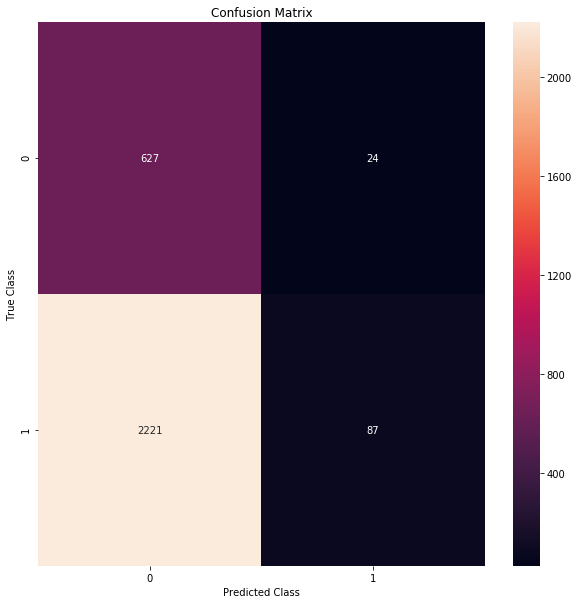

In [30]:
labels = [0, 1]

conf_matrix = confusion_matrix(y_test, gnb_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# Multinomial Naive Bayes

In [45]:
# KNN
# Scores returned non zero numbers but the code was slightly altered when I added the training and testing errors
# and now it is returning all zeros. 

k_range = range(1, 50)

scores = []

scores2 = []

training_error = []

testing_error = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)

    X = df.iloc[:, 1:200]

    y = df.isAlive

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

    knn.fit(X_train, y_train)

    pred = knn.predict_proba(X_test)

    #scores.append(metrics.accuracy_score(y_test, pred))
    
    #print(scores)
    #ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets
    
    score = float(sum(pred == y_test)) / len(y_test) 
    scores2.append([k, score])
    
    # calculate training error
    knn.fit(X, y)
    pred = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, pred)
    training_error.append(1 - training_accuracy)
    
    # calculate testing error
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, pred)
    testing_error.append(1 - testing_accuracy)

print(scores)
print(scores2)
print(training_error)
print(testing_error)

KeyboardInterrupt: 

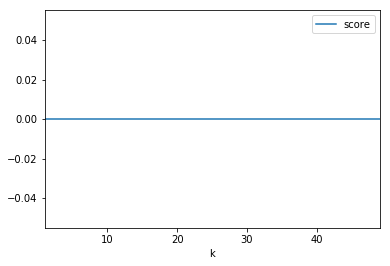

In [27]:
data = pd.DataFrame(scores2, columns=['k','score'])
data.plot.line(x='k', y='score');

In [33]:
# Linear Regression Run on the Age of Trees
X = df.iloc[:, 1:200]

y = df.Age

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

linreg.coef_

scores = cross_val_score(linreg, X_train, y_train, cv=200, scoring='neg_mean_squared_error')

agg = np.mean(np.sqrt(-scores))

print('Coefficents:', linreg.coef_)

print('Cross validation score:', scores)

print('RMSE:', agg)

Coefficents: [ 1.00000000e+00  1.57600357e-01  1.57600357e-01  1.57600357e-01
  1.57600357e-01  1.57600357e-01  1.57600357e-01  1.57600357e-01
  1.57600357e-01  1.57600357e-01  1.57600357e-01  2.30190786e-02
  2.30190786e-02  2.30190786e-02  2.30190786e-02  2.30190786e-02
  2.30190786e-02  2.30190786e-02  2.30190786e-02  2.30190786e-02
  2.30190786e-02  2.30190786e-02  2.30190786e-02  2.30190786e-02
  2.30190786e-02  2.30190786e-02  2.30190786e-02  2.30190786e-02
  1.49756180e-03  1.49756180e-03  5.67026792e-02  5.67026792e-02
  5.67026792e-02  5.67026792e-02  5.67026792e-02 -1.63435273e-04
  5.67026792e-02  5.67026792e-02  5.67026792e-02 -8.56711103e-02
  5.67026792e-02  5.67026792e-02 -2.85080795e-02 -2.85080795e-02
 -2.85080795e-02 -2.85080795e-02 -2.85080795e-02 -2.85080795e-02
 -1.40249884e-02 -1.40249884e-02 -1.40249884e-02 -1.40249884e-02
 -1.40249884e-02 -1.40249884e-02 -1.40249884e-02 -1.40249884e-02
 -1.40249884e-02 -1.40249884e-02 -1.40249884e-02 -1.40249884e-02
 -1.40249884

In [46]:
# Logistic Regression
X = df.iloc[:, 1:200]
y = df.isAlive
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

list_dummies = list(zip(names2, logreg.coef_[0]) )
list_agg = list(zip(feat_cols, logreg.coef_[0]))

#sorted(iterable[, key][, reverse])
print(list_dummies)
print(list_agg)

#print(sorted((list_agg), feat_cols), reverse=False)
      
#print("Features sorted by their score:")
#print(sorted(zip(map(lambda x: round(x, 4), logreg.coef_), 
#                 names2), reverse=False))
#TypeError: type numpy.ndarray doesn't define __round__ method

[('SpaceType1_Back Yard', 1.2133523126545627), ('SpaceType1_Front Yard', -0.10862232939485592), ('SpaceType1_Maintained Land', -0.12270319156514635), ('SpaceType1_Natural Area', 0.41047440928108897), ('SpaceType1_Open Land', 0.14066061708420213), ('SpaceType1_Planting Strip', -1.5072186290764573), ('SpaceType1_Road Median', -1.1552838577736142), ('SpaceType1_Side Yard', -0.7413130006049953), ('SpaceType1_Tree Box', -0.274139785719204), ('SpaceType1_Unknown', -0.22506728661465727), ('db_jdx_ ', 0.3173647607386337), ('db_jdx_CHRTERSCHOOL', -0.8662968267724154), ('db_jdx_COMMERCIAL', 1.4955206296924044), ('db_jdx_DCPS', -0.8852687284936356), ('db_jdx_DDOT', -2.600190466805357), ('db_jdx_DOT', 1.3317714198350832), ('db_jdx_DPR', -0.250855160530459), ('db_jdx_FED MILITARY', -0.601582004409566), ('db_jdx_FED NON-MILITARY', 0.090278770255275), ('db_jdx_NPS', 0.9229924030885248), ('db_jdx_OTHPRIVATE', 0.24224890084507392), ('db_jdx_OTHRMUNGOV', -0.0036424744317407206), ('db_jdx_PRIVATE', -0.64

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
y_pred_class = logreg.predict(X_test)

In [48]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.9151740452855694


In [49]:
max(y_test.mean(), 1 - y_test.mean())

0.7799932409597837

In [50]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 459  192]
 [  59 2249]]


In [51]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [52]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

print('Sensitivity:', (TP/(float(TP + FN))))
print('Specificity:', (TN/(float(TN + FP))))

True Positives: 2249
True Negatives: 459
False Positives: 192
False Negatives: 59
Sensitivity: 0.9744367417677643
Specificity: 0.7050691244239631


Text(0, 0.5, 'Frequency')

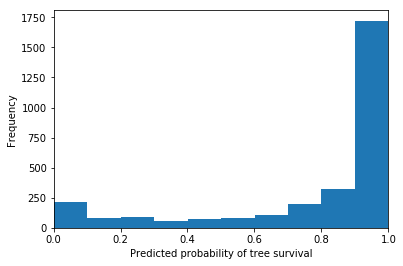

In [53]:
%matplotlib inline
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of tree survival')
plt.ylabel('Frequency')

lin reg train score: 1.0
lin reg test score: 0.9999998781683206
ridge reg train score l-alpha: 0.9999999999999335
ridge reg test score l-alpha: 0.9999999999999296
ridge reg train score h-alpha: 0.9999958701183962
ridge reg test score h-alpha: 0.999995692521587


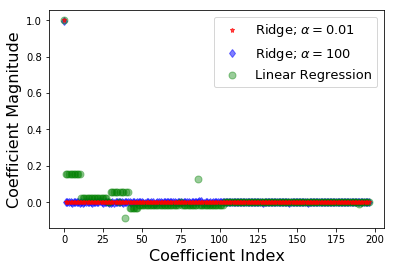

In [54]:
# Ridge Regression on Age of Tree
X = df.iloc[:, 1:200]
y = df.Age
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01)

rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("lin reg train score:", train_score)
print("lin reg test score:", test_score)
print("ridge reg train score l-alpha:", Ridge_train_score)
print("ridge reg test score l-alpha:", Ridge_test_score)
print("ridge reg train score h-alpha:", Ridge_train_score100)
print("ridge reg test score h-alpha:", Ridge_test_score100)

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=0)
plt.show()

In [55]:
# Random Forest Regression 
X = df.iloc[:, 1:200]

y = df.isAlive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


forest = RandomForestRegressor(n_estimators=200)
forest.fit(X_train, y_train)

forest_pred = forest.predict(X_test)

roc_auc = metrics.roc_auc_score(y_test, forest_pred)

errors = abs(forest_pred - y_test)
scores = cross_val_score(forest, X, y, cv=10, scoring='neg_mean_squared_error')
rmse = np.mean(np.sqrt(-scores))
#mape = 100 * (errors / y_test)
#accuracy = 100 - np.mean(mape)

print("Roc_Auc : ",roc_auc)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print("RMSE :",rmse)
#print('Accuracy:', round(accuracy, 2), '%.')


Roc_Auc :  0.9754620274900367
Mean Absolute Error: 0.05 degrees.
RMSE : 0.3881645156059149


In [147]:
# Random Forest Classifier  
X = df.iloc[:, 1:200]

y = df.isAlive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


forest = RandomForestClassifier(n_estimators=200)
forest.fit(X_train, y_train)

forest_pred = forest.predict(X_test)

roc_auc = metrics.roc_auc_score(y_test, forest_pred)

errors = abs(forest_pred - y_test)
scores = cross_val_score(forest, X, y, cv=10, scoring='neg_mean_squared_error')
rmse = np.mean(np.sqrt(-scores))
#mape = 100 * (errors / y_test)
#accuracy = 100 - np.mean(mape)

print("Roc_Auc : ",roc_auc)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print("RMSE :",rmse)
#print('Accuracy:', round(accuracy, 2), '%.')


Roc_Auc :  0.7005976008114432
Mean Absolute Error: 0.16 degrees.
RMSE : 0.5443599677480878


In [149]:
y_pred_class = forest.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

print('Sensitivity:', (TP/(float(TP + FN))))
print('Specificity:', (TN/(float(TN + FP))))

True Positives: 2181
True Negatives: 297
False Positives: 354
False Negatives: 127
Sensitivity: 0.9449740034662045
Specificity: 0.45622119815668205


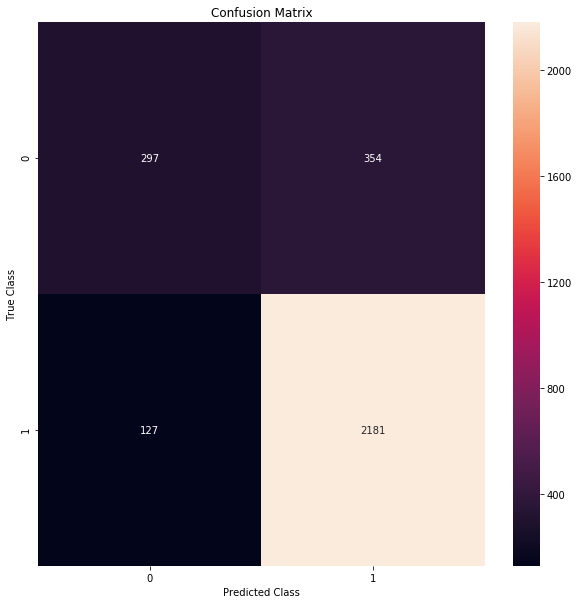

In [148]:
labels = [0, 1]

conf_matrix = confusion_matrix(y_test, forest_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# Compare model scores


Feature Selection

In [52]:
# Recursive Feature Elimination on SVM
X = df.iloc[:, 1:200]
y = df.isAlive

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 10)
rfe = rfe.fit(X, y)

# print summaries for the selection of attributes
#print(rfe.support_)
#print(rfe.ranking_)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), 
                 names2), reverse=False))


Features sorted by their score:
[(1, 'db_Genus_Franklinia'), (2, 'db_Nursery_ForestFarms'), (3, 'db_Genus_Ligustrum'), (4, 'db_Genus_Populus'), (5, 'db_Genus_Euonymus'), (6, 'db_Genus_Ebenaceae'), (7, 'db_Genus_Hisbiscus'), (8, 'db_Genus_Crataegus'), (9, 'SpaceType1_Open Land'), (10, 'db_Genus_Castanea'), (11, 'db_Genus_Arborvitae'), (12, 'db_Nursery_DR Snell'), (13, 'db_Genus_Sophora'), (14, 'db_Nursery_Adams County'), (15, 'db_StockT_BR'), (16, 'db_Genus_Salix'), (17, 'db_Genus_Unknown'), (18, 'db_Prog_TGA'), (19, 'db_Genus_Cercidiphyllum'), (20, 'db_Genus_Cotinus'), (21, 'db_Nursery_Fine Earth'), (22, 'db_Genus_Physocarpus'), (23, 'db_Nursery_Manor View Farm'), (24, 'db_Nursery_Nonesuch Nursery'), (25, 'db_Genus_X Cuprocyparis'), (26, 'db_Genus_Syringa'), (27, 'db_Nursery_Select Tree Farms'), (28, 'db_Genus_Larix'), (29, 'db_Genus_Alnus'), (30, 'db_Genus_Citrus'), (31, 'SpaceType1_Unknown'), (32, 'db_Prog_AER'), (33, 'db_Genus_Taxus'), (34, 'db_Genus_Hibiscus'), (35, 'db_Prog_DOEE')

In [56]:
# Recursive Feature Elimination on RF
X = df.iloc[:, 1:200]
y = df.isAlive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

forest = RandomForestRegressor(n_estimators=5)

rfe = RFE(forest, 10)
rfe = rfe.fit(X_train, y_train)

#print(rfe.support_)
#print(rfe.ranking_)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), 
                 names2), reverse=False))
#print(df.columns.rfe.ranking_)

Features sorted by their score:
[(1, 'SpaceType1_Back Yard'), (1, 'SpaceType1_Natural Area'), (1, 'SpaceType1_Planting Strip'), (1, 'db_Nursery_Clear Ridge Nursery Inc.'), (1, 'db_Prog_AER'), (1, 'db_Prog_DDOE'), (1, 'db_StockT_BR'), (1, 'db_jdx_DPR'), (1, 'db_jdx_FED MILITARY'), (1, 'db_jdx_UNIVERSITY'), (2, 'db_Nursery_Robin Hill Farm Nursery'), (3, 'db_jdx_DDOT'), (4, 'db_Season_Spring'), (5, 'db_Prog_TGA'), (6, 'db_Nursery_Buddies Nursery'), (7, 'db_Genus_Pyrus'), (8, 'SpaceType1_Road Median'), (9, 'db_Nursery_Rose Creek Nursery'), (10, 'db_Genus_Rhus'), (11, "db_Nursery_Schichtel's"), (12, 'db_Nursery_Behnke'), (13, 'db_Nursery_Riveredge Farms'), (14, 'db_jdx_PRIVTSCHOOL'), (15, 'db_Genus_Malus'), (16, 'db_Genus_Acer'), (17, 'SpaceType1_Maintained Land'), (18, 'db_Genus_Liriodendron'), (19, 'db_jdx_OTHRMUNGOV'), (20, 'db_Prog_PEPCO'), (21, 'db_Genus_Chamaecyparis'), (22, 'db_Genus_Citrus'), (23, 'db_Nursery_Fine Earth'), (24, 'db_Genus_Juglans'), (25, 'db_StockT_HB'), (26, 'db_Gen

In [138]:
X = df.iloc[:, 1:200]
y = df.isAlive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

extra_trees = ExtraTreesClassifier()
extra_trees.fit(X_train, y_train)

#print(extra_trees.feature_importances_)

print("Features sorted by their importance:")
print(sorted(zip(map(lambda x: round(x, 4), extra_trees.feature_importances_), 
                 names2), reverse=False))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.0, 'db_Genus_Amydalus'), (0.0, 'db_Genus_Aronia'), (0.0, 'db_Genus_Aureum'), (0.0, 'db_Genus_Camellia'), (0.0, 'db_Genus_Heptacodium'), (0.0, 'db_Genus_Hibiscus'), (0.0, 'db_Genus_Larix'), (0.0, 'db_Genus_Ligustrum'), (0.0, 'db_Genus_Taxus'), (0.0, 'db_Genus_Tsuga'), (0.0, 'db_Nursery_Adams County'), (0.0, 'db_Nursery_Boyer'), (0.0, 'db_Nursery_Carol Herwig'), (0.0, 'db_Nursery_Frager'), (0.0, 'db_Nursery_George Riseling'), (0.0, "db_Nursery_Johnson's Florist and Garden Centers"), (0.0, 'db_Nursery_Klyn'), (0.0, 'db_Nursery_Manor View Farm'), (0.0, 'db_Nursery_Moore & Dorsey'), (0.0, 'db_Nursery_Old City Green'), (0.0, 'db_Nursery_Stark Bros'), (0.0, 'db_Nursery_Unknown'), (0.0, 'db_Prog_DOEE'), (0.0001, 'db_Genus_Alnus'), (0.0001, 'db_Genus_Cupressus'), (0.0001, 'db_Genus_Eucommia'), (0.0001, 'db_Genus_Populus'), (0.0001, 'db_Genus_X Cuprocyparis'), (0.0001, 'db_Genus_Ziziphus'), (0.0001, 'db_Nursery_ARS'), (0.0001, 'db_Prog_DDOT Elms'), (0.0002, 'd

Composite & Advanced Models

In [ ]:
# Create a Feature Ranking Matrix

#names = list(X.columns)

#X = df.iloc[:, 1:200]
#y = df.isAlive

#ranks = {}

#def rank_to_dict(ranks, names, order=1):
#    minmax = MinMaxScaler()
#    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
#    ranks = list([map(lambda x: round(x, 2), ranks)])
#    return dict(zip(names, ranks ))

#lr = LinearRegression(normalize=True)
#lr.fit(X, y)
#ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
 
#ridge = Ridge(alpha=7)
#ridge.fit(X, y)
#ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
#lasso = Lasso(alpha=.05)
#lasso.fit(X, y)
#ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
#rlasso = RandomizedLasso(alpha=0.04)
#rlasso.fit(X, y)
#ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)
 
#stop the search when 5 features are left (they will get equal scores)
#rfe = RFE(lr, n_features_to_select=5)
#rfe.fit(X, y)
#ranks["RFE"] = rank_to_dict(list(map(float, rfe.ranking_)), names, order=-1)

#rf = RandomForestRegressor()
#rf.fit(X, y)
#ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
 
#f, pval  = f_regression(X, y, center=True)
#ranks["Corr."] = rank_to_dict(f, names)
 
#mine = MINE()
#mic_scores = []
#for i in range(X.shape[1]):
#    mine.compute_score(X.iloc[:,i], y)
#    m = mine.mic()
#    mic_scores.append(m)

#ranks["MIC"] = rank_to_dict(mic_scores, names) 
 
#r = {}
#for name in names:
#    r[name] = list(round(np.mean([ranks[method][name] 
#                            for method in list(ranks.keys())]), 2))
#list(dict.keys())
#methods = sorted(ranks.keys())
#ranks["Mean"] = r
#methods.append("Mean")
 
#print("\t%s" % "\t".join(methods))
#for name in names:
#    print("%s\t%s" % (name, "\t".join(list(map(str, 
#                         [ranks[method][name] for method in methods])))))

In [57]:
# Comparision of Classification Models
X = df.iloc[:, 1:200]
y = df.isAlive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
    
print('Accuracy for Gaussian Naive Bayes Classifier:' + str(accuracy_score(y_test, gnb_pred)*100)+'%')
print('Roc_Auc Score for Gaussian Naive Bayes Classifier:' + str(metrics.roc_auc_score(y_test, gnb_pred)))

knn = KNeighborsClassifier(n_neighbors=27)
knn_fit = knn.fit(X_train, y_train)
knn_pred = knn_fit.predict(X_test)
    
print('Accuracy for KNeighbors Classifier:' + str(accuracy_score(y_test, knn_pred)*100)+'%')
print('Roc_Auc Score for KNeighbors Classifier:' + str(metrics.roc_auc_score(y_test, knn_pred)))
    
log_reg = LogisticRegression()
log_fit = log_reg.fit(X_train, y_train)
log_pred = log_fit.predict(X_test)
    
print('Accuracy for Logistic Regression:' + str(accuracy_score(y_test, log_pred )*100)+'%')
print('Roc_Auc Score for Logistic Regression:' + str(metrics.roc_auc_score(y_test, log_pred)))

Accuracy for Gaussian Naive Bayes Classifier:24.704291990537346%
Roc_Auc Score for Gaussian Naive Bayes Classifier:0.503545738192409
Accuracy for KNeighbors Classifier:91.24704291990537%
Roc_Auc Score for KNeighbors Classifier:0.8115520849140239
Accuracy for Logistic Regression:91.51740452855694%
Roc_Auc Score for Logistic Regression:0.8397529330958636


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


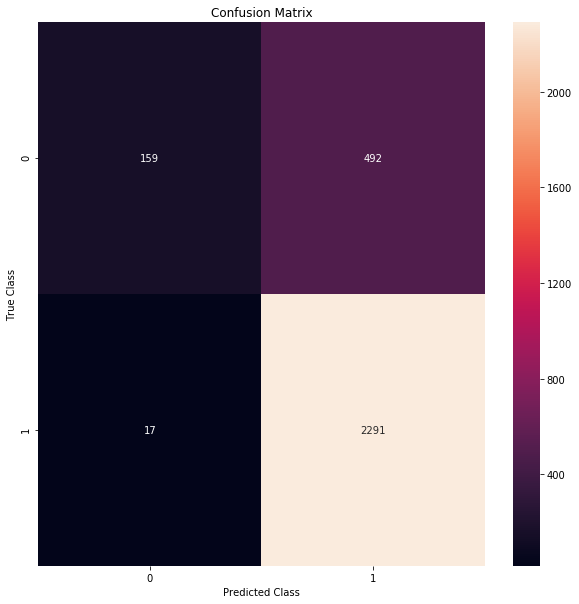

In [97]:
labels = [0, 1]

conf_matrix = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()